In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tau_df = pd.read_csv("tau_vs_perf_df.csv")
knn_df = pd.read_csv("knn_vs_perf_df.csv")
ens_df = pd.read_csv("ens_vs_perf_df.csv")
knn_df.confidence_threshold = knn_df.confidence_threshold.apply(lambda x:1 - x)
tau_df.confidence_threshold = tau_df.confidence_threshold.apply(lambda x:1 - x/100)
ens_df.confidence_threshold = ens_df.confidence_threshold.apply(lambda x:1 - x)

In [ ]:
tau_df.patch_avg_prec = tau_df.patch_avg_prec.apply(lambda x: x*100)
knn_df.patch_avg_prec = knn_df.patch_avg_prec.apply(lambda x: x*100)
ens_df.patch_avg_prec = ens_df.patch_avg_prec.apply(lambda x: x*100)

In [ ]:
tau_df

,Unnamed: 0,confidence_threshold,remaining_cores,patch_auroc,patch_macro_acc,patch_avg_prec,patch_brier_score,patch_expected_calibration_error,core_auroc,core_macro_acc,core_avg_prec,core_brier_score,core_expected_calibration_error
0,0,1.0,1.0,0.665761,0.654891,66.298181,0.245543,0.145470,0.665761,0.654891,0.662982,0.245543,0.145470
1,1,0.9,8.0,0.739207,0.681110,68.184781,0.232774,0.055262,0.837063,0.727448,0.743907,0.198895,0.088391
2,2,0.8,18.0,0.722968,0.660854,66.955924,0.232246,0.049579,0.827295,0.749094,0.708310,0.205883,0.066371
3,3,0.7,26.0,0.716223,0.656827,66.347694,0.232210,0.050617,0.809929,0.748531,0.693550,0.212571,0.103746
4,4,0.6,34.0,0.711814,0.656035,66.008496,0.232662,0.050643,0.811398,0.757932,0.691785,0.212251,0.094090
5,5,0.5,38.0,0.715512,0.660488,66.337210,0.230865,0.047175,0.814630,0.751175,0.686180,0.211585,0.091734
6,6,0.4,46.0,0.717019,0.661765,66.560829,0.230312,0.046713,0.815072,0.758261,0.674219,0.212320,0.086632
7,7,0.3,47.0,0.716718,0.662289,66.601646,0.229881,0.046685,0.811015,0.747391,0.635929,0.214024,0.087544
8,8,0.2,50.0,0.715756,0.660910,66.562963,0.230699,0.049476,0.807246,0.754058,0.643128,0.215121,0.103773
9,9,0.1,51.0,0.716375,0.661121,66.724187,0.230146,0.049394,0.807246,0.760725,0.649935,0.215237,0.103542


In [ ]:
knn_df_all = knn_df.copy()
knn_df = knn_df[knn_df.num_neighbours==15]
knn_df

,Unnamed: 0,confidence_threshold,num_neighbours,remaining_cores,patch_auroc,patch_macro_acc,patch_avg_prec,patch_brier_score,patch_expected_calibration_error,core_auroc,core_macro_acc,core_avg_prec,core_brier_score,core_expected_calibration_error
22,22,1.0,15.0,1.0,0.673913,0.558424,0.631547,0.240705,0.143757,0.666667,0.559091,0.672639,0.241108,0.113387
23,23,0.9,15.0,3.0,0.707046,0.646628,0.703355,0.232887,0.026607,0.750403,0.665056,0.714232,0.226340,0.091692
24,24,0.8,15.0,5.0,0.683195,0.639959,0.660081,0.231180,0.037550,0.741250,0.712500,0.634808,0.224528,0.120276
25,25,0.7,15.0,9.0,0.687863,0.632516,0.639763,0.228203,0.042271,0.743278,0.703265,0.614139,0.224103,0.122778
26,26,0.6,15.0,14.0,0.668161,0.616959,0.607571,0.229726,0.027991,0.733638,0.681735,0.627444,0.226130,0.108424
27,27,0.5,15.0,21.0,0.668777,0.620853,0.602300,0.229011,0.025826,0.746667,0.713333,0.646509,0.223942,0.146765
28,28,0.4,15.0,27.0,0.668477,0.620521,0.600490,0.228341,0.026839,0.737681,0.712029,0.654949,0.224397,0.149277
29,29,0.3,15.0,38.0,0.668389,0.618471,0.600544,0.227371,0.027811,0.740000,0.707826,0.642480,0.223541,0.149772
30,30,0.2,15.0,45.0,0.665842,0.614694,0.599608,0.227296,0.027576,0.740870,0.696957,0.632390,0.223520,0.143640
31,31,0.1,15.0,49.0,0.666227,0.615054,0.600591,0.226981,0.026518,0.740870,0.703623,0.640310,0.223265,0.151844


## Compute calibration metrics

In [ ]:
ece_tau_core, std1 = tau_df.core_expected_calibration_error.mean(), tau_df.core_expected_calibration_error.std(), 
ece_tau_patch, std2 = tau_df.patch_expected_calibration_error.mean(), tau_df.patch_expected_calibration_error.std()

print("Core ECE: {0} +- {1}".format(ece_tau_core, std1))
print("Patch ECE: {0} +- {1}".format(ece_tau_patch, std1))

Core ECE: 0.09835712814872911 +- 0.019734684200911182
Patch ECE: 0.058316920629956456 +- 0.019734684200911182


In [ ]:
ece_knn_core, std1 = knn_df.core_expected_calibration_error.mean(), knn_df.core_expected_calibration_error.std(), 
ece_knn_patch, std2 = knn_df.patch_expected_calibration_error.mean(), knn_df.patch_expected_calibration_error.std()

print("Core ECE: {0} +- {1}".format(ece_knn_core, std1))
print("Patch ECE: {0} +- {1}".format(ece_knn_patch, std1))

Core ECE: 0.1307476000352339 +- 0.020405586211249306
Patch ECE: 0.03994078476997933 +- 0.020405586211249306


In [ ]:
ece_ens_core, std1 = ens_df.core_expected_calibration_error.mean(), ens_df.core_expected_calibration_error.std(), 
ece_ens_patch, std2 = ens_df.patch_expected_calibration_error.mean(), ens_df.patch_expected_calibration_error.std()

print("Core ECE: {0} +- {1}".format(ece_ens_core, std1))
print("Patch ECE: {0} +- {1}".format(ece_ens_patch, std1))

Core ECE: 0.2170229432257739 +- 0.0226197926266436
Patch ECE: 0.18166415257887406 +- 0.0226197926266436


### Visualize metrics with pointplots

#### ECE

Text(0, 0.5, 'Core-based ECE')

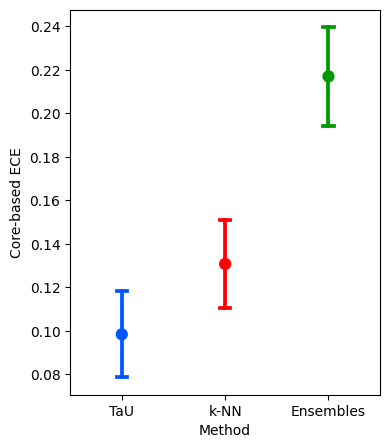

In [ ]:
df_for_violon_ece = pd.DataFrame({
    'TaU': tau_df.core_expected_calibration_error,
    'k-NN': knn_df.core_expected_calibration_error,
    'Ensembles': ens_df.core_expected_calibration_error
})

my_pal = {"TaU": "#05f", "k-NN": "#f00", "Ensembles": "#090"}
plt.figure(figsize=(4,5))
sns.pointplot(data=df_for_violon_ece, errorbar=('sd',1), join=False, capsize=.1, palette=my_pal, markers='o')
plt.xlabel("Method")
plt.ylabel("Core-based ECE")

Text(0, 0.5, 'Patch-based ECE')

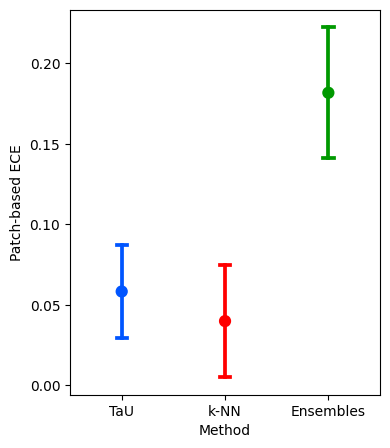

In [ ]:
df_for_violon_ece = pd.DataFrame({
    'TaU': tau_df.patch_expected_calibration_error,
    'k-NN': knn_df.patch_expected_calibration_error,
    'Ensembles': ens_df.patch_expected_calibration_error
})

my_pal = {"TaU": "#05f", "k-NN": "#f00", "Ensembles": "#090"}
plt.figure(figsize=(4,5))
sns.pointplot(data=df_for_violon_ece, errorbar='sd', join=False, capsize=.1, palette=my_pal, markers='o')
plt.xlabel("Method")
plt.ylabel("Patch-based ECE")

#### Brier Score

Text(0, 0.5, 'Core-based Brier Score')

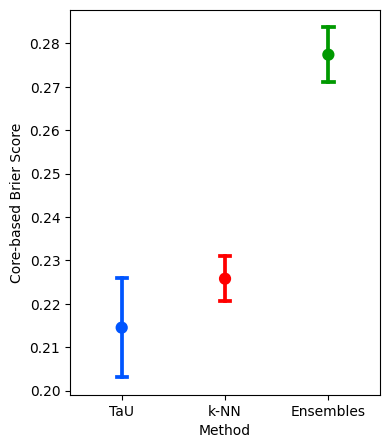

In [ ]:
df_for_violon_bs = pd.DataFrame({
    'TaU': tau_df.core_brier_score,
    'k-NN': knn_df.core_brier_score,
    'Ensembles': ens_df.core_brier_score
})

my_pal = {"TaU": "#05f", "k-NN": "#f00", "Ensembles": "#090"}
plt.figure(figsize=(4,5))
sns.pointplot(df_for_violon_bs, errorbar='sd', join=False, capsize=.1, palette=my_pal, markers='o')
plt.xlabel("Method")
plt.ylabel("Core-based Brier Score")

Text(0, 0.5, 'Patch-based Brier Score')

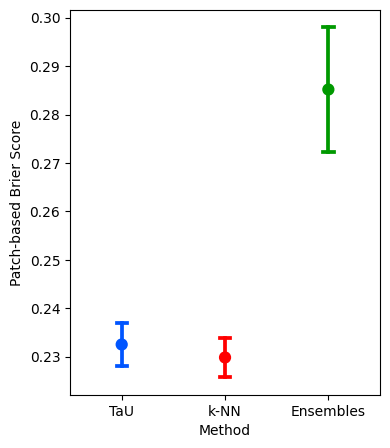

In [ ]:
df_for_violon_bs = pd.DataFrame({
    'TaU': tau_df.patch_brier_score,
    'k-NN': knn_df.patch_brier_score,
    'Ensembles': ens_df.patch_brier_score
})

my_pal = {"TaU": "#05f", "k-NN": "#f00", "Ensembles": "#090"}
plt.figure(figsize=(4,5))
sns.pointplot(df_for_violon_bs, errorbar='sd', join=False, capsize=.1, palette=my_pal, markers='o')
plt.xlabel("Method")
plt.ylabel("Patch-based Brier Score")

### Number of remainig cores per threshold

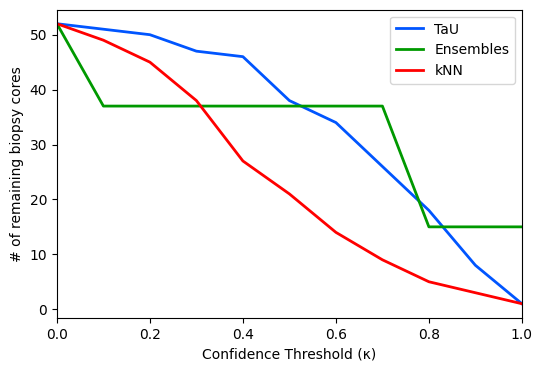

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(tau_df, x='confidence_threshold', y='remaining_cores', color='#05f', linewidth=2, label='TaU')
sns.lineplot(ens_df, x='confidence_threshold', y='remaining_cores', color='#090', linewidth=2, label='Ensembles')
sns.lineplot(knn_df, x='confidence_threshold', y='remaining_cores', color='#f00', linewidth=2, label='kNN').set_xlim(left=0,right=1)
plt.ylabel('# of remaining biopsy cores')
plt.xlabel("Confidence Threshold (κ)")
plt.legend()

In [ ]:
#tau_df=tau_df[tau_df.confidence_threshold != 1]
#knn_df=knn_df[knn_df.confidence_threshold != 1]
#ens_df=ens_df[ens_df.confidence_threshold != 1]

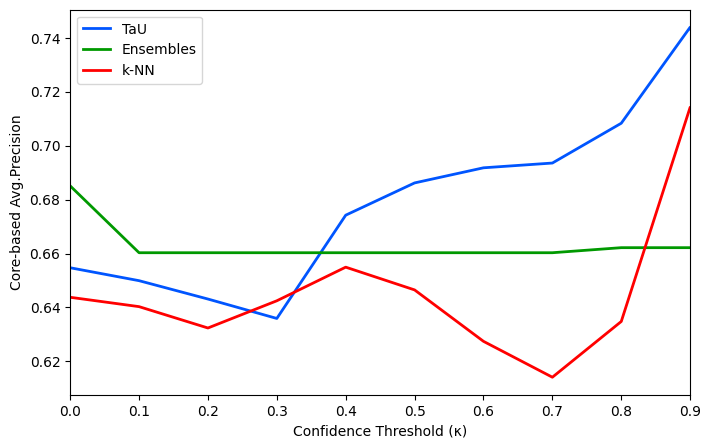

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(tau_df, x='confidence_threshold', y='core_avg_prec', color='#05f', linewidth=2, label='TaU').set_xlim(left=0, right=0.9)
sns.lineplot(ens_df, x='confidence_threshold', y='core_avg_prec', color='#090', linewidth=2, label='Ensembles')
sns.lineplot(knn_df, y='core_avg_prec', x='confidence_threshold', color='#f00', linewidth=2, label='k-NN')
plt.xticks([i/10 for i in list(range(0,10))])
plt.ylabel("Core-based Avg.Precision")
plt.xlabel("Confidence Threshold (κ)")
plt.legend()

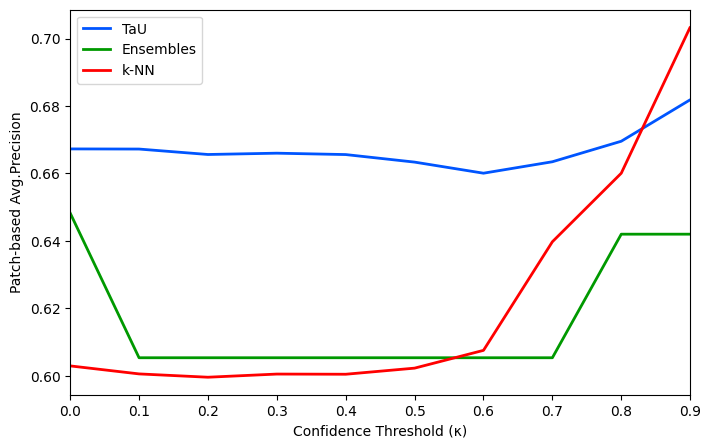

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(tau_df, x='confidence_threshold', y='patch_avg_prec', color='#05f', linewidth=2, label='TaU')
sns.lineplot(ens_df, x='confidence_threshold', y='patch_avg_prec', color='#090', linewidth=2, label='Ensembles')
sns.lineplot(knn_df, y='patch_avg_prec', x='confidence_threshold', color='#f00', linewidth=2, label='k-NN').set_xlim(left=0, right=0.9)
plt.ylabel("Patch-based Avg.Precision")
plt.xlabel("Confidence Threshold (κ)")
plt.legend()